### Import tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

### Import data

In [3]:
X_train = pd.read_csv('../data/X_train_trans.csv', index_col=0)

pickle_in = open('../data/y_train.pickle', 'rb')
y_train = pickle.load(pickle_in)

### Decision Tree (vanilla model) with train data
- the model overfits, all four scores (precision, recall, f1, accuracy) = 1

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [5]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [6]:
features = X_train.columns.tolist()

In [7]:
from sklearn.tree.export import export_text

r = export_text(clf, feature_names= features)
print(r)

|--- total_charge <= 1.38
|   |--- customer_service_calls <= 1.49
|   |   |--- x2_yes <= 0.50
|   |   |   |--- x4_395 <= 0.50
|   |   |   |   |--- x4_402 <= 0.50
|   |   |   |   |   |--- x4_408 <= 0.50
|   |   |   |   |   |   |--- number_vmail_messages <= 1.48
|   |   |   |   |   |   |   |--- x4_361 <= 0.50
|   |   |   |   |   |   |   |   |--- x4_399 <= 0.50
|   |   |   |   |   |   |   |   |   |--- x4_411 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- x4_415 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- x4_415 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- x4_411 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- account_length <= 1.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- account_length >  1.15
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1


/Users/viviandang/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [8]:
clf.tree_.node_count

193

In [9]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=features,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Churn_DTree_Vanilla")

'Churn_DTree_Vanilla.pdf'

In [10]:
y_pred = clf.predict(X_train)

In [11]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [12]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
print ('accuracy score:', clf.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred))
print ('precision:', precision_score(y_train, y_pred))
print ('f1:', f1_score(y_train, y_pred))

accuracy score: 1.0
recall: 1.0
precision: 1.0
f1: 1.0


#### With cross-validation, average precision score is 0.837

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring= 'precision')

In [15]:
np.average(scores)

0.8372782117155518

### Hyperparameter with Gridsearch
- The best value for max_dept is 5 and max_features is None

In [16]:
from sklearn.model_selection import GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
tree_clf = DecisionTreeClassifier()

max_depth_params = range(2, 12)

max_features_param = [None, 'auto', 'sqrt', 'log2']

param_grid = {'max_depth': max_depth_params, 'max_features': max_features_param}

gridsearch = GridSearchCV(estimator = tree_clf, 
                          param_grid = param_grid,
                          n_jobs = -1, #parallel computation
                          verbose = 1, #give feedback
                          cv = 10, #cross-validate 10 times
                          scoring = 'precision', #can use multiple scoring  , recall, precision..ect
                          return_train_score= True)

gridsearch = gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.1s finished


In [18]:
gridsearch.best_estimator_

NameError: name 'gridsearch' is not defined

In [30]:
gridsearch.best_score_

1.0

In [17]:
gridsearch.cv_results_;

NameError: name 'gridsearch' is not defined

In [32]:
colums = ['params', 'mean_test_score', 
          'std_test_score', 'rank_test_score',
          'mean_train_score', 'std_train_score']

results = pd.DataFrame(gridsearch.cv_results_)[colums]
results.sort_values(by = 'rank_test_score').head(10)

,params,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
0,"{'max_depth': 2, 'max_features': None}",1.000000,0.000000,1,1.000000,0.000000
4,"{'max_depth': 3, 'max_features': None}",0.983833,0.026688,2,0.986503,0.002204
8,"{'max_depth': 4, 'max_features': None}",0.981246,0.025093,3,1.000000,0.000000
12,"{'max_depth': 5, 'max_features': None}",0.976407,0.026453,4,0.996945,0.001528
16,"{'max_depth': 6, 'max_features': None}",0.973289,0.029121,5,0.999247,0.001507
20,"{'max_depth': 7, 'max_features': None}",0.957220,0.025288,6,0.998516,0.002459
24,"{'max_depth': 8, 'max_features': None}",0.941741,0.033407,7,0.998886,0.001702
28,"{'max_depth': 9, 'max_features': None}",0.930234,0.047924,8,0.998902,0.001677
36,"{'max_depth': 11, 'max_features': None}",0.926044,0.030279,9,0.999282,0.001436
32,"{'max_depth': 10, 'max_features': None}",0.908830,0.048586,10,0.998917,0.001654


In [33]:
results.shape

(40, 6)

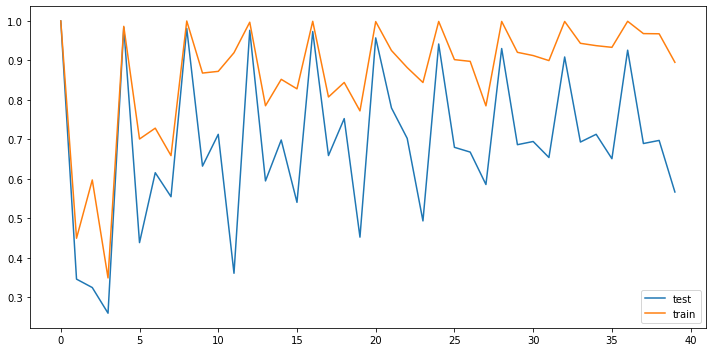

In [34]:
roc_test_scores = gridsearch.cv_results_['mean_test_score']

roc_training_scores = gridsearch.cv_results_['mean_train_score']

plt.plot(range(40), roc_test_scores, label = 'test')
plt.plot(range(40), roc_training_scores, label = 'train')


plt.legend()
plt.tight_layout()

In [49]:
tuned_clf = DecisionTreeClassifier(max_depth = 5)

In [50]:
tuned_clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
features2 = X_train.columns.tolist()

In [52]:
tuned_clf.tree_.node_count

31

In [53]:

dot_data = tree.export_graphviz(tuned_clf, out_file=None, 
                     feature_names=features2,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Tuned_DTree1")

'Tuned_DTree1.pdf'

In [54]:
y_pred = tuned_clf.predict(X_train)

In [55]:
print ('accuracy:', tuned_clf.score(X_train, y_train))
print ('recall:', recall_score(y_train, y_pred))
print ('precision:', precision_score(y_train, y_pred))
print ('f1:', f1_score(y_train, y_pred))

accuracy: 0.9789969995713673
recall: 0.8579881656804734
precision: 0.9965635738831615
f1: 0.9220985691573926


In [56]:
import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10, 5]

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion Matrix, without normalization
[[1994    1]
 [  48  290]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1995
           1       1.00      0.86      0.92       338

    accuracy                           0.98      2333
   macro avg       0.99      0.93      0.95      2333
weighted avg       0.98      0.98      0.98      2333



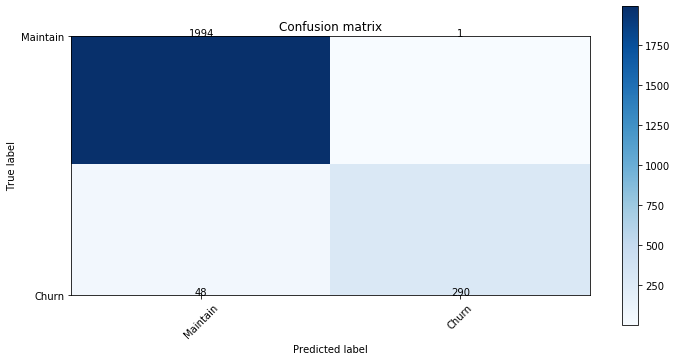

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm = confusion_matrix(y_train, y_pred)
classes = ['Maintain', 'Churn']
plot_confusion_matrix(cm, classes,
                      normalize=False,
                      title='Confusion matrix')

#Checking performance our model with classification report.
print(classification_report(y_train, y_pred))

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tuned_clf, X_train, y_train, cv=5, scoring= 'precision')
np.average(scores)

0.9666954663281835